In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

def generar_graficos_lineas(file, fila_index=0):
    """
    Genera un gráfico de líneas usando los encabezados como eje X y los valores de una fila específica como eje Y.

    Args:
        file (str): Ruta al archivo CSV.
        fila_index (int): Índice de la fila a usar para los valores del eje Y (por defecto, la primera fila).

    Returns:
        None
    """
    try:
        # Leer el archivo CSV
        df = pd.read_csv(file, header=0)
        
        # Verificar que el índice de la fila esté dentro del rango
        if fila_index < 0 or fila_index >= len(df):
            print(f"Índice de fila {fila_index} fuera de rango. El archivo tiene {len(df)} filas.")
            return
        
        # Obtener la fila seleccionada y los encabezados
        fila = df.iloc[fila_index]
        encabezados = df.columns[1:]  # Excluir la columna 'IDENTIFICADOR'
        valores = fila[1:]  # Excluir el valor de 'IDENTIFICADOR' para los datos numéricos
        
        # Limpiar valores numéricos (eliminar comas y convertir a números)
        valores = valores.replace({',': ''}, regex=True).astype(float)
        
        # Crear el gráfico
        plt.figure(figsize=(10, 6))
        plt.plot(encabezados, valores, marker='o', linestyle='-', color='b')
        plt.title(f"Gráfico de Líneas - {fila[0]}", fontsize=14)  # Usar el valor de 'IDENTIFICADOR' como título
        plt.xlabel("Semestre", fontsize=12)
        plt.ylabel("Valores", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        
        # Mostrar el gráfico
        plt.show()
    
    except Exception as e:
        print(f"Error al generar el gráfico: {e}")

Error al generar el gráfico: could not convert string to float: '2DO SEMESTRE 2022'


/tmp/ipykernel_57191/2570184129.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Gráfico de Líneas - {fila[0]}", fontsize=14)  # Usar el valor de 'IDENTIFICADOR' como título


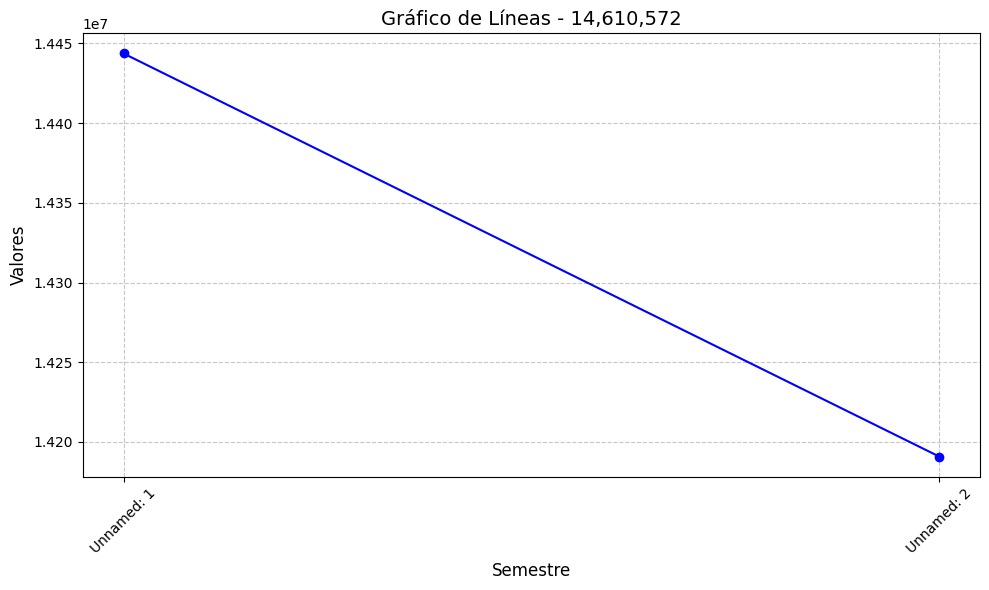

In [4]:
archivo_csv = "../data/processed_wf/Tabulados_Fza_Trabajo - Table 1_filtrado.csv"
generar_graficos_lineas(archivo_csv, fila_index=0)  # Graficar la primera fila
generar_graficos_lineas(archivo_csv, fila_index=3)  # Graficar otra fil

In [5]:
def graficar_todo_csv(file):
    """
    Genera un gráfico de líneas con todas las filas del archivo CSV, 
    ajustando los límites del eje Y al valor mínimo y máximo.

    Args:
        file (str): Ruta al archivo CSV.

    Returns:
        None
    """
    try:
        # Leer el archivo CSV
        df = pd.read_csv(file, header=0)
        
        # Obtener los encabezados para el eje X (excluyendo IDENTIFICADOR)
        encabezados = df.columns[1:]
        
        # Limpiar los valores numéricos (remover comas y convertir a float)
        datos = df.iloc[:, 1:].replace({',': ''}, regex=True).astype(float)
        
        # Calcular los límites del eje Y
        valor_minimo = datos.min().min()
        valor_maximo = datos.max().max()
        
        # Crear el gráfico
        plt.figure(figsize=(12, 8))
        
        for index, row in df.iterrows():
            valores = datos.iloc[index]
            plt.plot(encabezados, valores, marker='o', label=row['IDENTIFICADOR'])
        
        # Configurar el gráfico
        plt.title("Gráfico de Líneas - Todos los Valores del CSV", fontsize=16)
        plt.xlabel("Semestre", fontsize=14)
        plt.ylabel("Valores", fontsize=14)
        plt.xticks(rotation=45)
        plt.ylim(valor_minimo, valor_maximo)  # Establecer límites en el eje Y
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title="Identificadores", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        
        # Mostrar el gráfico
        plt.show()
        
        # Imprimir los valores mínimo y máximo en consola
        print(f"Valor mínimo: {valor_minimo}")
        print(f"Valor máximo: {valor_maximo}")
    
    except Exception as e:
        print(f"Error al generar el gráfico: {e}")

In [6]:
archivo_csv = "../data/processed_wf/Tabulados_Fza_Trabajo - Table 1_filtrado.csv"
graficar_todo_csv(archivo_csv)

Error al generar el gráfico: could not convert string to float: '2DO SEMESTRE 2022'
